In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [134]:
data = pd.read_csv("50startups.csv")

In [211]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [136]:
data.keys(
)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [137]:
x = data.iloc[:,:-1]

In [138]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [169]:
y = data.iloc[:,-1]

In [140]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [114]:
states = pd.get_dummies(x['State'],drop_first = True)

In [115]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [141]:
x = x.drop('State',axis = 1)

In [117]:
x = pd.concat([x,states],axis = 1)

In [166]:
x = (x-np.mean(x))/np.std(x)

In [143]:
x = np.hstack((np.ones((len(x),1)),x))

In [170]:
y = y[:,np.newaxis]

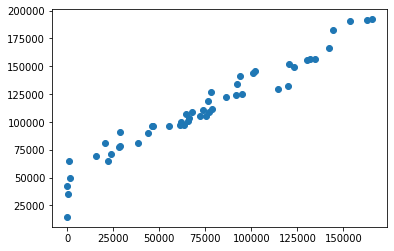

In [145]:
plt.scatter(data.iloc[:,0],data.iloc[:,-1])

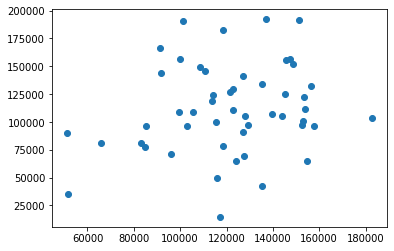

In [146]:
plt.scatter(data.iloc[:,1],data.iloc[:,-1])

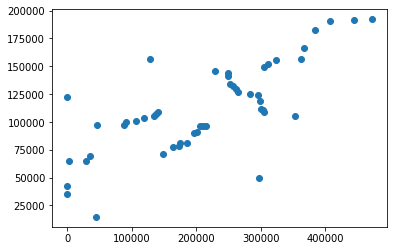

In [147]:
plt.scatter(data.iloc[:,2],data.iloc[:,-1])

In [171]:
x

array([[-1.00333607,  0.63078923,  0.34960593,  3.65926504],
       [-1.00333607,  0.60359634,  0.49270874,  3.3836738 ],
       [-1.00333607,  0.51310632, -0.00373119,  3.02824407],
       [-1.00333607,  0.42347701,  0.16948008,  2.7837905 ],
       [-1.00333607,  0.40109147, -0.10012715,  2.61547227],
       [-1.00333607,  0.29998471, -0.01688379,  2.58278882],
       [-1.00333607,  0.32704972,  0.45141072,  0.25887091],
       [-1.00333607,  0.28438183,  0.43491799,  2.19750581],
       [-1.00333607,  0.18796778,  0.46643357,  2.07630754],
       [-1.00333607,  0.21556449,  0.07072308,  2.01076719],
       [-1.00333607,  0.00385426,  0.08964831,  1.26143653],
       [-1.00333607, -0.00841164, -0.09618544,  1.46486288],
       [-1.00333607, -0.07569673,  0.25495292,  1.46580067],
       [-1.00333607, -0.09419126,  0.33574284,  1.49372481],
       [-1.00333607,  0.18204514,  0.54380182,  1.53175424],
       [-1.00333607,  0.12848329,  0.20846815,  1.58377118],
       [-1.00333607, -0.

In [191]:
params = np.zeros((4,1))
params

array([[0.],
       [0.],
       [0.],
       [0.]])

In [173]:
def prediction(x,y,params):
    return np.dot(x,params)

In [174]:
def computecost(x,y,params):
    ypre = prediction(x,y,params)
    return np.sum(np.power(ypre-y,2))/(2*len(x))

In [192]:
def Gradientdescent(x,y,iterations,params,params_history,loss_history):
    i=0
    while True:
        if i==0:
            params_history.append(params)
            ypre = prediction(x,y,params)
            diff = ypre-y
            cost = computecost(x,y,params)
            loss_history.append(cost)
            params = params-(0.01/len(x))*np.dot(x.T,diff)
            prev = cost
            i+=1
        else:
            params_history.append(params)
            ypre = prediction(x,y,params)
            diff = ypre-y
            params = params-(0.01/len(x))*np.dot(x.T,diff)
            cost = computecost(x,y,params)
            loss_history.append(cost)
            if cost==prev:
                break
            prev = cost
    return params,computecost(x,y,params)


In [193]:
params_history = []
loss_history = []
params,loss = Gradientdescent(x,y,1000,params,params_history,loss_history)

In [72]:
computecost(x,y,params)

353473193762.30896

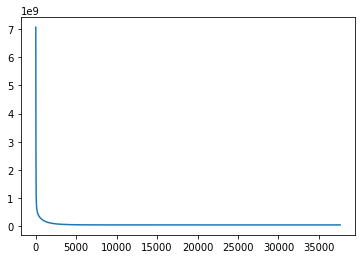

In [196]:
plt.plot(loss_history)

In [197]:
params

array([[-131523.90974153],
       [  81525.8660295 ],
       [  -2713.32624879],
       [   2755.06903363]])

In [198]:
loss

39208563.0096257

In [200]:
rss = np.sum(np.power(prediction(x,y,params)-y,2))

In [201]:
tss = np.sum(np.power(prediction(x,y,params)-np.mean(y),2))

In [202]:
r2 = 1-(rss/tss)

In [203]:
r2

0.9481943501298026

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
multilinear = LinearRegression()

In [206]:
multilinear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
ypre = multilinear.predict(x)

In [208]:
from sklearn.metrics import r2_score

In [209]:
r2_score(ypre,y)

0.9481943587046702